# Implement Logistic Regression Method

In [1]:
# Load packages
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
np.random.seed(123)
# Create traing and test datasets
X,Y = make_classification(1000)  
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
Y_train, Y_test = np.expand_dims(Y_train, axis=1), np.expand_dims(Y_test, axis=1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 20) (800, 1)
(200, 20) (200, 1)


In [3]:
X_train

array([[-0.14387855, -1.55692334, -1.46126087, ..., -1.51413585,
        -0.10393076, -0.52076804],
       [-0.44922382, -0.92942258, -0.93734285, ..., -0.06349576,
         0.7454721 ,  2.08769876],
       [-1.32686991,  3.60370277,  1.13956478, ..., -2.1560246 ,
        -1.2010625 , -0.51367718],
       ...,
       [ 2.15584656, -0.77556726, -0.81966976, ..., -0.59666829,
        -0.81378464, -0.83283487],
       [-0.45266616,  1.70760659, -1.1912974 , ...,  0.35234845,
         0.44263838, -0.40778968],
       [ 0.14344611,  0.83190748, -1.01771058, ..., -0.06366124,
         0.12788249, -1.2735883 ]])

## 1. Standardization $(x - \mu)/\sigma$ (10 points)

In [4]:
# Standardize X_train and X_test 
def standardize(X):
    for i in range(shape(X)[1]):
        # need to be completed
        mxi=X_train[:,i].mean()
        stdxi=X_train[:,i].std()
        X[:,i]=(X[:,i]-mxi)/stdxi
        #print(mxi, stdxi, X[:,i])
    return X

In [5]:
stX_train=standardize(X_train)
stX_test=standardize(X_test)

Text(0.5, 1.0, 'Standardized X_test')

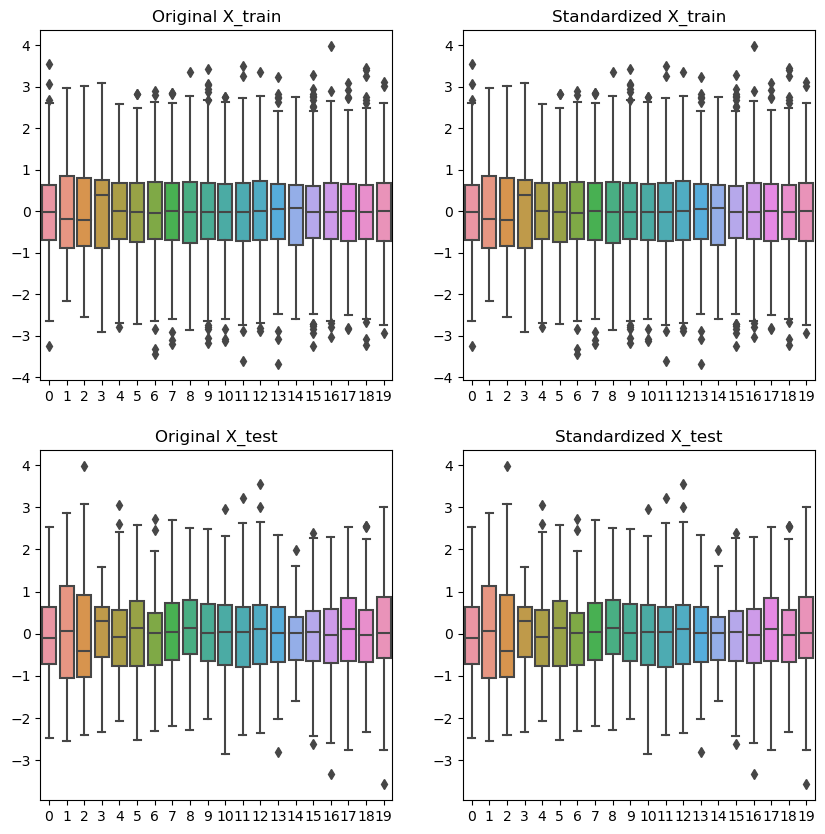

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(X_train)
plt.title('Original X_train')
plt.subplot(222)
sns.boxplot(stX_train)
plt.title('Standardized X_train')

plt.subplot(223)
sns.boxplot(X_test)
plt.title('Original X_test')
plt.subplot(224)
sns.boxplot(stX_test)
plt.title('Standardized X_test')


In [7]:
print(X_train.mean(), X_train.std())
print(stX_train.mean(),stX_train.std())

1.3322676295501879e-18 1.0
1.3322676295501879e-18 1.0


__The original dataset is a standardized dataset__

## 2. Initializing Parameters  (10 points)

In [8]:
# Return weight of size as (n+1) X 1 (using zeros, 21*1), 
# and X with size of m X (n+1) (using ones, add addition column of X, 800*21)

def initialize(X):
    # need to be completed
    
    weights=np.zeros((21,1))
    additional=np.ones((X.shape[0],1))
    X=np.concatenate((X, additional), axis=1)
    
    return weights,X

In [9]:
weights,X=initialize(X_train)

In [10]:
print(weights, weights.shape)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] (21, 1)


In [11]:
print(X, X.shape)

[[-0.19273906 -1.27836233 -1.1728965  ... -0.10597011 -0.53812411
   1.        ]
 [-0.49283552 -0.7614799  -0.75038527 ...  0.78059921  2.06935609
   1.        ]
 [-1.35539509  2.97252813  0.92452715 ... -1.25110794 -0.53103594
   1.        ]
 ...
 [ 2.06745433 -0.6347468  -0.65548835 ... -0.84688435 -0.85007291
   1.        ]
 [-0.49621869  1.41068331 -0.95518572 ...  0.4645147  -0.42518849
   1.        ]
 [ 0.08964656  0.68935592 -0.81519744 ...  0.13598636 -1.29065963
   1.        ]] (800, 21)


## 3. Sigmoid Function (10 points) 

In [12]:
# Sigmoid function: s = 1/(1+exp(-z)) 
def sigmoid(z):
    # need to be completed
    sig = 1/(1+np.exp(-z))
    return sig

Text(0, 0.5, 'sigmoid(z)')

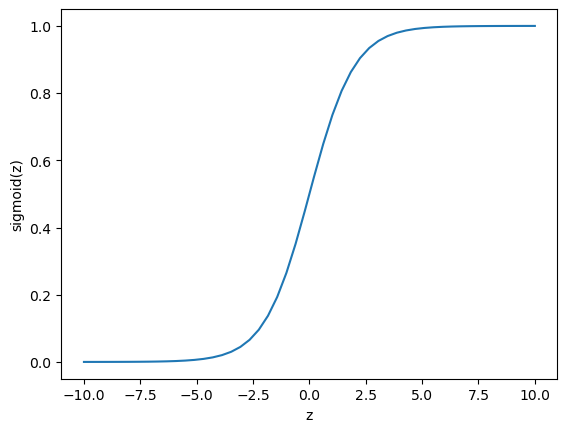

In [24]:
z=np.linspace(-10,10)
sig=sigmoid(z)
plt.plot(z,sig)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

## 4. Cost Function
## $ J_{\theta} = -\frac{1}{m}[ \sum_{i=1}^{m} y^{i} \log(h_{\theta}(x^{i})) + (1-y^{i}) \log(1- h_{\theta}(x^{i})) ]$ 
## $h_{\theta}(x) = sigmoid(z)$ (10 points)

In [14]:
def cost(X, theta,y): # theta is the weights
    z = dot(X,theta)
    cost0 = dot(y.T,log(sigmoid(z)))# need to be completed # y * log (sigmoid (z)) # dot(y.T, ...)
    cost1 = dot((1-y).T,log(1-sigmoid(z)))# need to be completed
    cost = -((cost1 + cost0))/len(y)
    return cost

## 5. Gradient Descent
## $ \theta_j = \theta_j -\alpha\frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{i}) -y^{i}) x_{j}^{i} $ (10 points)

In [15]:
def LogidticRegression_GD(X,y,alpha,iter):
    weights,X = initialize(X)
    cost_list = np.zeros(iter,) # hint: z = dot(X,weights)
    
    for i in range(iter):   
        z = dot(X,weights)
        #print(dot(X.T,sigmoid(z)-y))
        weights = weights - alpha*(dot(X.T,sigmoid(z)-y))/X.shape[0] # need to be completed # dot(X.T,  ...)
        #print(i,weights)
        #print(cost(X,weights ,y))
        cost_list[i] = cost(X,weights ,y)# need to be completed, calculate the cost 
        
    return weights, cost_list

## 6. Prediction (10 points)

In [16]:
def predict(weights,X):
    z = dot(initialize(X)[1],weights) # z = dot(X,weights)
    lis = []
    for i in sigmoid(z):
        if i>=0.5:
            lis.append(1)# need to be completed
        else:
            lis.append(0)# need to be completed
    return lis

## 7. Calculate Accuracy (10 points)

In [17]:
def Accuray(y,y_hat): # please check whether the dimensions are the same
    
    # need to be completed
    correct=0
    y = y.flatten().tolist()
    for i in range(len(y)):
        if y[i]==y_hat[i]:
            correct+=1
    acc=correct/len(y)
    return acc

## 8. Run the completed model (10 points)

In [18]:
#(1). standardize your train and test data
# need to be completed

stX_train=standardize(X_train)
stX_test=standardize(X_test)

#(2). define your learning rate and iterations
# need to be completed
alphas=[1e-2, 0.05, 0.1]
ite=500

#(3). get the weight and cost from LogidticRegression_GD function
# need to be completed
for alpha in alphas:
    weights, cost_list = LogidticRegression_GD(stX_train,Y_train,alpha,ite)

#(4). make predictions of your training and test datasets
# need to be completed

    pred=predict(weights,stX_test)

#(5). report your train and test accuray
# need to be completed

    print(f'lr:{alpha}, accuracy:{Accuray(Y_test,pred)}')

lr:0.01, accuracy:0.945
lr:0.05, accuracy:0.955
lr:0.1, accuracy:0.955


## 9. Plot the cost list to check if your model is converged. (10 points)

Text(0.5, 0, 'iteration')

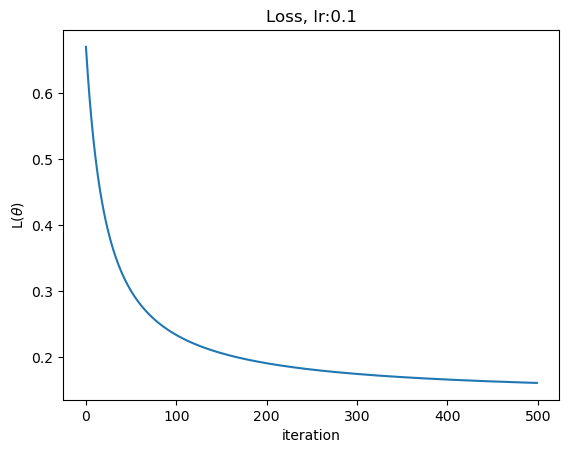

In [19]:
ite_list=[i for i in range(ite)]
plt.plot(ite_list,cost_list)
plt.title('Loss, lr:0.1')
plt.ylabel(r'L($\theta$)')
plt.xlabel('iteration')

__The model is converged. The final loss is under 0.2.__

## 10. Compare your results with LogisticRegression from sklearn  (10 points)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf=LogisticRegression().fit(stX_train, Y_train)

C:\Users\User\anaconda3\envs\New_one\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
pred=clf.predict(stX_test)

In [23]:
Accuray(Y_test,pred)

0.955

__The self-defined function above generates the same predictive accuracy as sklearn.__ 